In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import glob
import os

In [57]:
comp_tracts_df = pd.read_csv("IGS_7_tracts.csv")
comp_tracts_df.drop(columns=['N/A'], inplace=True)

highland_park_df = pd.read_csv('IGS405700.csv')
highland_park_df.drop(columns=['N/A'], inplace=True)

# Get unique tracts
tracts = comp_tracts_df['Census Tract FIPS code'].unique()

In [58]:
############## Merge Ethnicity dataset ##############

# Specify the directory where your files are located
directory_path = r"C:\Users\jabba\Desktop\Code\machine_learning\AUC_mastercard_challenge\src\demographic"

# Specify the file pattern
file_pattern = os.path.join(directory_path, 'acs_race_*.csv')

# Use glob to find all files matching the pattern
file_list = glob.glob(file_pattern)

# Initialize an empty list to hold the DataFrames
dataframes = []

# Specify the columns to keep
columns_to_keep = ['Label (Grouping)', 'ZCTA5 94606!!Estimate']

# Loop through each file, read it into a DataFrame, and append it to the list
for file in file_list:
    df = pd.read_csv(file)
    
    # Add a year column based on the file name
    year = os.path.basename(file).split('_')[-1].split('.')[0]
    
    # Keep only the specified columns along with the 'Year' column
    df = df[columns_to_keep].copy()  # Copy to avoid SettingWithCopyWarning
    df['Year'] = year  # Add the year column
    
    # Append the modified DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_race_df = pd.concat(dataframes, ignore_index=True)


# Renaming the columns
merged_race_df.rename(columns={
    'Label (Grouping)': 'Demographic Group',
    'ZCTA5 94606!!Estimate': 'Population Estimate',
    'Year': 'Estimate Year'
}, inplace=True)

# Save the merged DataFrame to a new CSV file
merged_race_df.to_csv('merged_acs_race_data.csv', index=False)

# Display the modified DataFrame
merged_race_df.head(20)

KeyError: "['ZCTA5 94606!!Estimate'] not in index"

In [53]:
df = pd.read_csv(r"C:\Users\jabba\Desktop\Code\machine_learning\AUC_mastercard_challenge\src\demographic\acs_age_sex_2017.csv")

In [56]:
# Specify the directory where your files are located
directory_path = r"C:\Users\jabba\Desktop\Code\machine_learning\AUC_mastercard_challenge\src\demographic"

# Specify the file pattern for age and sex datasets
age_sex_file_pattern = os.path.join(directory_path, 'acs_age_sex_*.csv')

# Use glob to find all files matching the pattern
age_sex_file_list = glob.glob(age_sex_file_pattern)

# Initialize an empty list to hold the DataFrames
age_sex_dataframes = []

# Loop through each file, read it into a DataFrame, and append it to the list
for file in age_sex_file_list:
    df = pd.read_csv(file)
    
    # Add a year column based on the file name
    year = os.path.basename(file).split('_')[-1].split('.')[0]
    
    # Create a list of columns to keep, excluding those with 'margin' or 'percent'
    columns_to_keep = ['Label (Grouping)'] + [col for col in df.columns if 'Estimate' in col and 'margin' not in col.lower() and 'percent' not in col.lower()]
    
    # Keep only the specified columns along with the 'Year' column
    df = df[columns_to_keep].copy()  # Copy to avoid SettingWithCopyWarning
    df['Year'] = year  # Add the year column
    
    # Append the modified DataFrame to the list
    age_sex_dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_age_sex_df = pd.concat(age_sex_dataframes, ignore_index=True)

# Drop any empty rows
merged_age_sex_df.dropna(inplace=True)  # Drops rows with any NaN values

# Remove rows that match 'Age' or 'Sex' regardless of casing
unwanted_values = ['Age', 'Sex', '']
merged_age_sex_df = merged_age_sex_df[~merged_age_sex_df['Label (Grouping)'].str.strip().str.lower().isin([val.lower() for val in unwanted_values])]


# Renaming the columns
merged_age_sex_df.rename(columns={
    'Label (Grouping)': 'Age Group',
    'ZCTA5 94606!!Total!!Estimate': 'Total Estimate',
    'ZCTA5 94606!!Male!!Estimate': 'Male Estimate',
    'ZCTA5 94606!!Female!!Estimate': 'Female Estimate',
    'Year': 'Estimate Year'
}, inplace=True)

# Save the merged DataFrame to a new CSV file
merged_age_sex_df.to_csv('merged_acs_age_sex_data.csv', index=False)

# Display the modified DataFrame
merged_age_sex_df.head(40)


,Age Group,"Census Tract 4052, Alameda County, California!!Total!!Estimate","Census Tract 4052, Alameda County, California!!Male!!Estimate","Census Tract 4052, Alameda County, California!!Female!!Estimate","Census Tract 4053.01, Alameda County, California!!Total!!Estimate","Census Tract 4053.01, Alameda County, California!!Male!!Estimate","Census Tract 4053.01, Alameda County, California!!Female!!Estimate","Census Tract 4053.02, Alameda County, California!!Total!!Estimate","Census Tract 4053.02, Alameda County, California!!Male!!Estimate","Census Tract 4053.02, Alameda County, California!!Female!!Estimate","Census Tract 4054.01, Alameda County, California!!Total!!Estimate","Census Tract 4054.01, Alameda County, California!!Male!!Estimate","Census Tract 4054.01, Alameda County, California!!Female!!Estimate","Census Tract 4054.02, Alameda County, California!!Total!!Estimate","Census Tract 4054.02, Alameda County, California!!Male!!Estimate","Census Tract 4054.02, Alameda County, California!!Female!!Estimate","Census Tract 4055, Alameda County, California!!Total!!Estimate","Census Tract 4055, Alameda County, California!!Male!!Estimate","Census Tract 4055, Alameda County, California!!Female!!Estimate","Census Tract 4056, Alameda County, California!!Total!!Estimate","Census Tract 4056, Alameda County, California!!Male!!Estimate","Census Tract 4056, Alameda County, California!!Female!!Estimate","Census Tract 4057, Alameda County, California!!Total!!Estimate","Census Tract 4057, Alameda County, California!!Male!!Estimate","Census Tract 4057, Alameda County, California!!Female!!Estimate","Census Tract 4058, Alameda County, California!!Total!!Estimate","Census Tract 4058, Alameda County, California!!Male!!Estimate","Census Tract 4058, Alameda County, California!!Female!!Estimate","Census Tract 4059.01, Alameda County, California!!Total!!Estimate","Census Tract 4059.01, Alameda County, California!!Male!!Estimate","Census Tract 4059.01, Alameda County, California!!Female!!Estimate","Census Tract 4059.02, Alameda County, California!!Total!!Estimate","Census Tract 4059.02, Alameda County, California!!Male!!Estimate","Census Tract 4059.02, Alameda County, California!!Female!!Estimate","Census Tract 4060, Alameda County, California!!Total!!Estimate","Census Tract 4060, Alameda County, California!!Male!!Estimate","Census Tract 4060, Alameda County, California!!Female!!Estimate",Estimate Year,Census Tract 4052; Alameda County; California!!Total!!Estimate,Census Tract 4052; Alameda County; California!!Male!!Estimate,Census Tract 4052; Alameda County; California!!Female!!Estimate,Census Tract 4053.01; Alameda County; California!!Total!!Estimate,Census Tract 4053.01; Alameda County; California!!Male!!Estimate,Census Tract 4053.01; Alameda County; California!!Female!!Estimate,Census Tract 4053.02; Alameda County; California!!Total!!Estimate,Census Tract 4053.02; Alameda County; California!!Male!!Estimate,Census Tract 4053.02; Alameda County; California!!Female!!Estimate,Census Tract 4054.01; Alameda County; California!!Total!!Estimate,Census Tract 4054.01; Alameda County; California!!Male!!Estimate,Census Tract 4054.01; Alameda County; California!!Female!!Estimate,Census Tract 4054.02; Alameda County; California!!Total!!Estimate,Census Tract 4054.02; Alameda County; California!!Male!!Estimate,Census Tract 4054.02; Alameda County; California!!Female!!Estimate,Census Tract 4055; Alameda County; California!!Total!!Estimate,Census Tract 4055; Alameda County; California!!Male!!Estimate,Census Tract 4055; Alameda County; California!!Female!!Estimate,Census Tract 4056; Alameda County; California!!Total!!Estimate,Census Tract 4056; Alameda County; California!!Male!!Estimate,Census Tract 4056; Alameda County; California!!Female!!Estimate,Census Tract 4057; Alameda County; California!!Total!!Estimate,Census Tract 4057; Alameda County; California!!Male!!Estimate,Census Tract 4057; Alameda County; California!!Female!!Estimate,Census Tract 4058; Alameda County

In [55]:
# Clean the 'Demographic Group' names to standardize them
merged_age_sex_df['Age Group'] = merged_age_sex_df['Age Group'].str.strip()
merged_race_df['Demographic Group'] = merged_race_df['Demographic Group'].str.strip()

# Check for unique demographic groups in both datasets
print("Age Groups:", merged_age_sex_df['Age Group'].unique())
print("Demographic Groups:", merged_race_df['Demographic Group'].unique())

# Merge datasets on 'Demographic Group' and 'Estimate Year'
# You may need to ensure that 'Total population' matches with 'Total:'
merged_data = pd.merge(merged_age_sex_df, merged_race_df,
                       left_on=['Age Group', 'Estimate Year'],
                       right_on=['Demographic Group', 'Estimate Year'],
                       how='outer')

# Check for missing values
missing_values = merged_data.isnull().sum()

# Drop unnecessary columns if needed
merged_data = merged_data.drop(columns=['Estimate Year_x', 'Estimate Year_y'], errors='ignore')

# Save the merged DataFrame to a new CSV file
merged_data.to_csv('final_merged_demographics_data.csv', index=False)

# Display the merged dataset and missing values
merged_data.head()
"Missing values:\n", missing_values

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
merged_data


Age Groups: []
Demographic Groups: ['Total:' 'White alone' 'Black or African American alone'
 'American Indian and Alaska Native alone' 'Asian alone'
 'Native Hawaiian and Other Pacific Islander alone'
 'Some other race alone' 'Two or more races:'
 'Two races including Some other race'
 'Two races excluding Some other race, and three or more races'
 'Some Other Race alone' 'Two or More Races:'
 'Two races including Some Other Race'
 'Two races excluding Some Other Race, and three or more races']


,Age Group,"Census Tract 4051, Alameda County, California!!Total!!Estimate","Census Tract 4051, Alameda County, California!!Male!!Estimate","Census Tract 4051, Alameda County, California!!Female!!Estimate","Census Tract 4053.01, Alameda County, California!!Total!!Estimate","Census Tract 4053.01, Alameda County, California!!Male!!Estimate","Census Tract 4053.01, Alameda County, California!!Female!!Estimate","Census Tract 4053.02, Alameda County, California!!Total!!Estimate","Census Tract 4053.02, Alameda County, California!!Male!!Estimate","Census Tract 4053.02, Alameda County, California!!Female!!Estimate","Census Tract 4054.01, Alameda County, California!!Total!!Estimate","Census Tract 4054.01, Alameda County, California!!Male!!Estimate","Census Tract 4054.01, Alameda County, California!!Female!!Estimate","Census Tract 4054.02, Alameda County, California!!Total!!Estimate","Census Tract 4054.02, Alameda County, California!!Male!!Estimate","Census Tract 4054.02, Alameda County, California!!Female!!Estimate","Census Tract 4055, Alameda County, California!!Total!!Estimate","Census Tract 4055, Alameda County, California!!Male!!Estimate","Census Tract 4055, Alameda County, California!!Female!!Estimate","Census Tract 4056, Alameda County, California!!Total!!Estimate","Census Tract 4056, Alameda County, California!!Male!!Estimate","Census Tract 4056, Alameda County, California!!Female!!Estimate","Census Tract 4057, Alameda County, California!!Total!!Estimate","Census Tract 4057, Alameda County, California!!Male!!Estimate","Census Tract 4057, Alameda County, California!!Female!!Estimate","Census Tract 4058, Alameda County, California!!Total!!Estimate","Census Tract 4058, Alameda County, California!!Male!!Estimate","Census Tract 4058, Alameda County, California!!Female!!Estimate","Census Tract 4059.01, Alameda County, California!!Total!!Estimate","Census Tract 4059.01, Alameda County, California!!Male!!Estimate","Census Tract 4059.01, Alameda County, California!!Female!!Estimate","Census Tract 4059.02, Alameda County, California!!Total!!Estimate","Census Tract 4059.02, Alameda County, California!!Male!!Estimate","Census Tract 4059.02, Alameda County, California!!Female!!Estimate","Census Tract 4060, Alameda County, California!!Total!!Estimate","Census Tract 4060, Alameda County, California!!Male!!Estimate","Census Tract 4060, Alameda County, California!!Female!!Estimate",Census Tract 4051; Alameda County; California!!Total!!Estimate,Census Tract 4051; Alameda County; California!!Male!!Estimate,Census Tract 4051; Alameda County; California!!Female!!Estimate,Census Tract 4053.01; Alameda County; California!!Total!!Estimate,Census Tract 4053.01; Alameda County; California!!Male!!Estimate,Census Tract 4053.01; Alameda County; California!!Female!!Estimate,Census Tract 4053.02; Alameda County; California!!Total!!Estimate,Census Tract 4053.02; Alameda County; California!!Male!!Estimate,Census Tract 4053.02; Alameda County; California!!Female!!Estimate,Census Tract 4054.01; Alameda County; California!!Total!!Estimate,Census Tract 4054.01; Alameda County; California!!Male!!Estimate,Census Tract 4054.01; Alameda County; California!!Female!!Estimate,Census Tract 4054.02; Alameda County; California!!Total!!Estimate,Census Tract 4054.02; Alameda County; California!!Male!!Estimate,Census Tract 4054.02; Alameda County; California!!Female!!Estimate,Census Tract 4055; Alameda County; California!!Total!!Estimate,Census Tract 4055; Alameda County; California!!Male!!Estimate,Census Tract 4055; Alameda County; California!!Female!!Estimate,Census Tract 4056; Alameda County; California!!Total!!Estimate,Census Tract 4056; Alameda County; California!!Male!!Estimate,Census Tract 4056; Alameda County; California!!Female!!Estimate,Census Tract 4057; Alameda County; California!!Total!!Estimate,Census Tract 4057; Alameda County; California!!Male!!Estimate,Census Tract 4057; Alameda County; California!!Female!!Estimate,Census Tract 4058; Alameda County; California!!

In [ ]:
###### Ignore #####

Unique years for this tract: [2017 2018 2019 2020 2021 2022 2023]


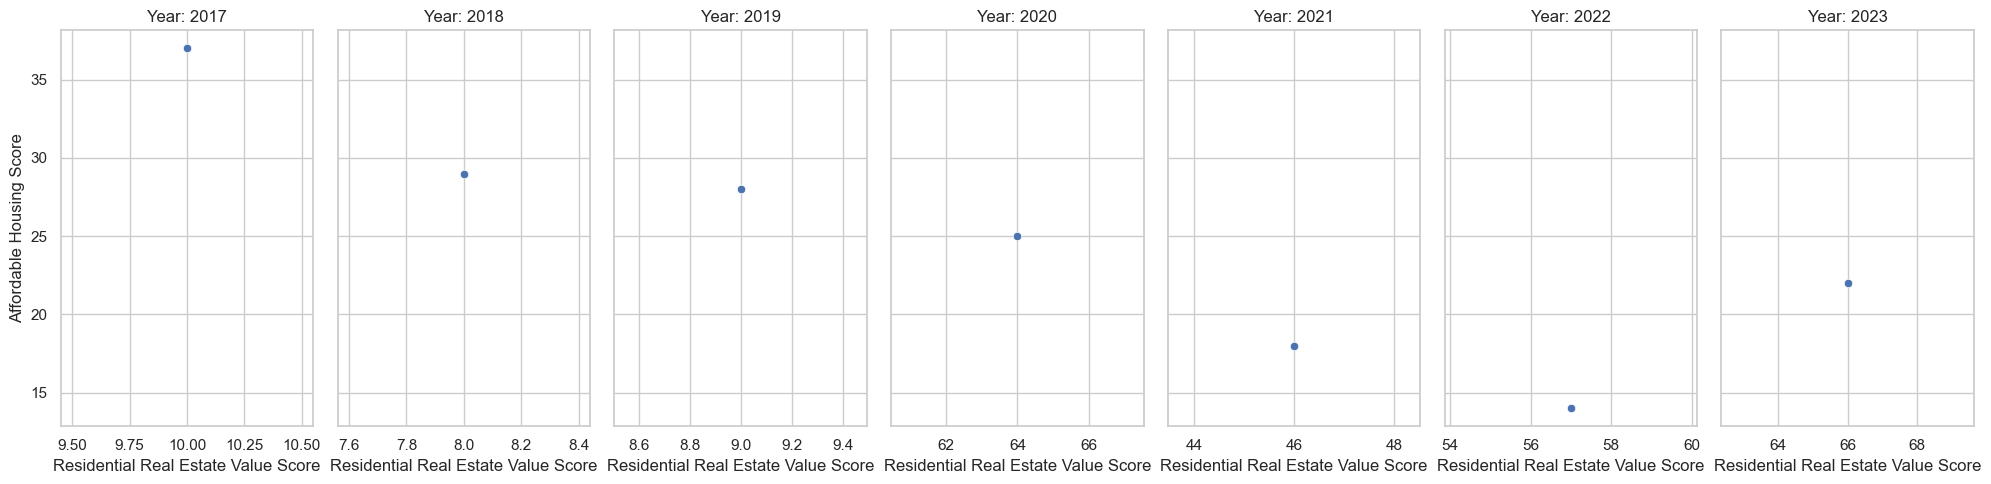

In [5]:
# Load your data
comp_tracts_df = pd.read_csv("IGS_7_tracts.csv")

# Set the style of the visualization
sns.set(style="whitegrid")

# Choose a specific tract code to analyze
specific_tract = tracts[0]  # Replace with the actual tract code

# Filter the DataFrame for the specific tract
tract_data = comp_tracts_df[comp_tracts_df['Census Tract FIPS code'] == specific_tract]

# Check if tract_data is not empty
if len(tract_data) == 0:
    print("No data available for the specified tract.")
else:
    # Get unique years
    years = tract_data['Year'].unique()
    print("Unique years for this tract:", years)

    # Create subplots only if there are unique years
    if len(years) > 0:
        fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(20, 5), sharey=True)

        # Loop through each year to create a subplot
        for i, year in enumerate(years):
            year_data = tract_data[tract_data['Year'] == year]

            # Plot Affordable Housing vs. Residential Real Estate Value for the year
            sns.scatterplot(data=year_data, x='Residential Real Estate Value Score', y='Affordable Housing Score', ax=axes[i])

            # Adding title and labels
            axes[i].set_title(f'Year: {year}')
            axes[i].set_xlabel('Residential Real Estate Value Score')
            axes[i].set_ylabel('Affordable Housing Score')

        # Show the plot
        plt.tight_layout()
        plt.show()
    else:
        print("No years available for this tract.")


In [7]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Calculate the average Affordable Housing score for each tract
average_affordable_housing = comp_tracts_df.groupby('Census Tract FIPS code')['Affordable Housing Score'].mean().reset_index()

# Extract the average for Highland Park tract (replace with actual tract code)
highland_park_tract_code = highland_park_df['Census Tract FIPS code']  # Replace with the actual tract code
highland_park_score = average_affordable_housing[average_affordable_housing['Census Tract FIPS code'] == highland_park_tract_code]

# Check if the Highland Park score exists
if highland_park_score.empty:
    print("Highland Park tract code not found in the dataset.")
else:
    # Prepare data for plotting
    average_affordable_housing['Comparison'] = average_affordable_housing['Affordable Housing Score']
    
    # Add Highland Park score to the DataFrame
    average_affordable_housing = average_affordable_housing.append({
        'Census Tract FIPS code': 'Highland Park', 
        'Affordable Housing Score': highland_park_score['Affordable Housing Score'].values[0],
        'Comparison': highland_park_score['Affordable Housing Score'].values[0]
    }, ignore_index=True)

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=average_affordable_housing, x='Census Tract FIPS code', y='Comparison', palette='viridis')

    # Adding title and labels
    plt.title('Average Affordable Housing Scores Comparison')
    plt.xlabel('Census Tract FIPS Code')
    plt.ylabel('Average Affordable Housing Score')
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
print(highland_park_df['Census Tract FIPS code'])


Highland Park tract code not found in the dataset.
0    6001405700
1    6001405700
2    6001405700
3    6001405700
4    6001405700
5    6001405700
6    6001405700
Name: Census Tract FIPS code, dtype: int64


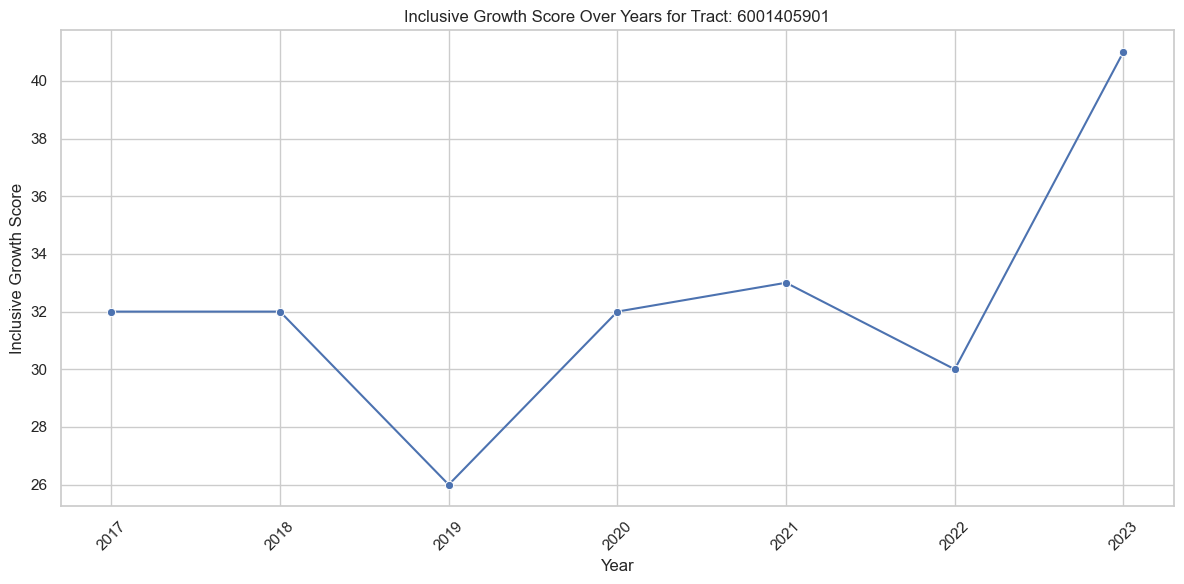

In [5]:

# Set the style of the visualization
sns.set(style="whitegrid")

# Choose a specific tract code to analyze
specific_tract = tracts[1]  # Replace with the actual tract code

# Filter the DataFrame for the specific tract
tract_data = comp_tracts_df[comp_tracts_df['Census Tract FIPS code'] == specific_tract]

# Check if tract_data is not empty
if len(tract_data) == 0:
    print("No data available for the specified tract.")
else:
    # Create the line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=tract_data, x='Year', y='Inclusive Growth Score', marker='o')

    # Adding title and labels
    plt.title(f'Inclusive Growth Score Over Years for Tract: {specific_tract}')
    plt.xlabel('Year')
    plt.ylabel('Inclusive Growth Score')
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

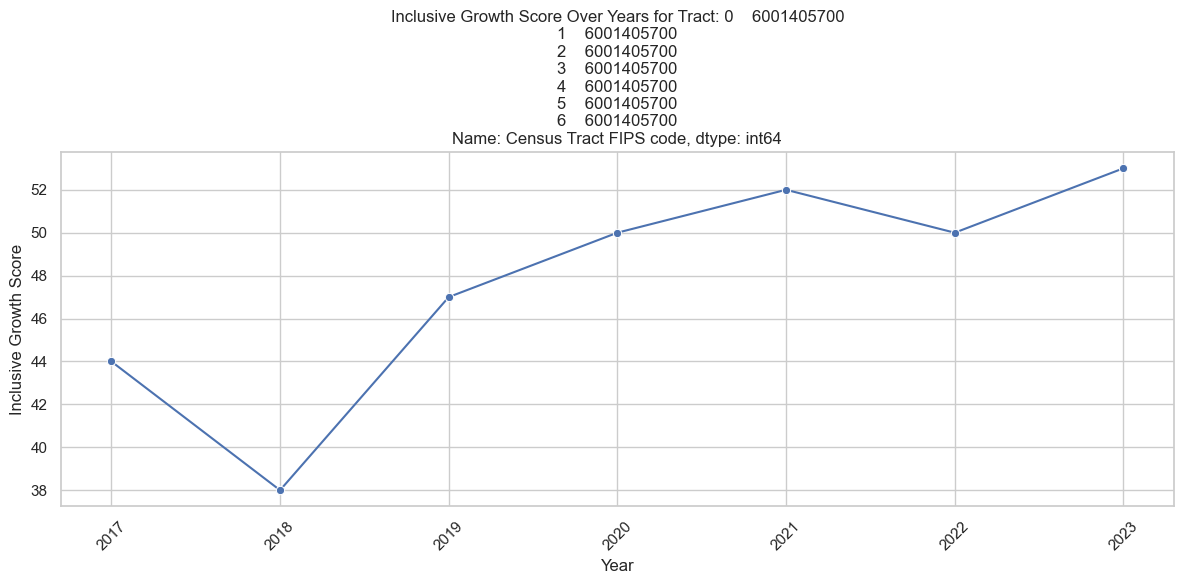

In [58]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Choose a specific tract code to analyze
specific_tract = highland_park_df['Census Tract FIPS code']  # Replace with the actual tract code

# Filter the DataFrame for the specific tract
tract_data = highland_park_df[highland_park_df['Census Tract FIPS code'] == specific_tract]

# Check if tract_data is not empty
if len(tract_data) == 0:
    print("No data available for the specified tract.")
else:
    # Create the line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=tract_data, x='Year', y='Inclusive Growth Score', marker='o')

    # Adding title and labels
    plt.title(f'Inclusive Growth Score Over Years for Tract: {specific_tract}')
    plt.xlabel('Year')
    plt.ylabel('Inclusive Growth Score')
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

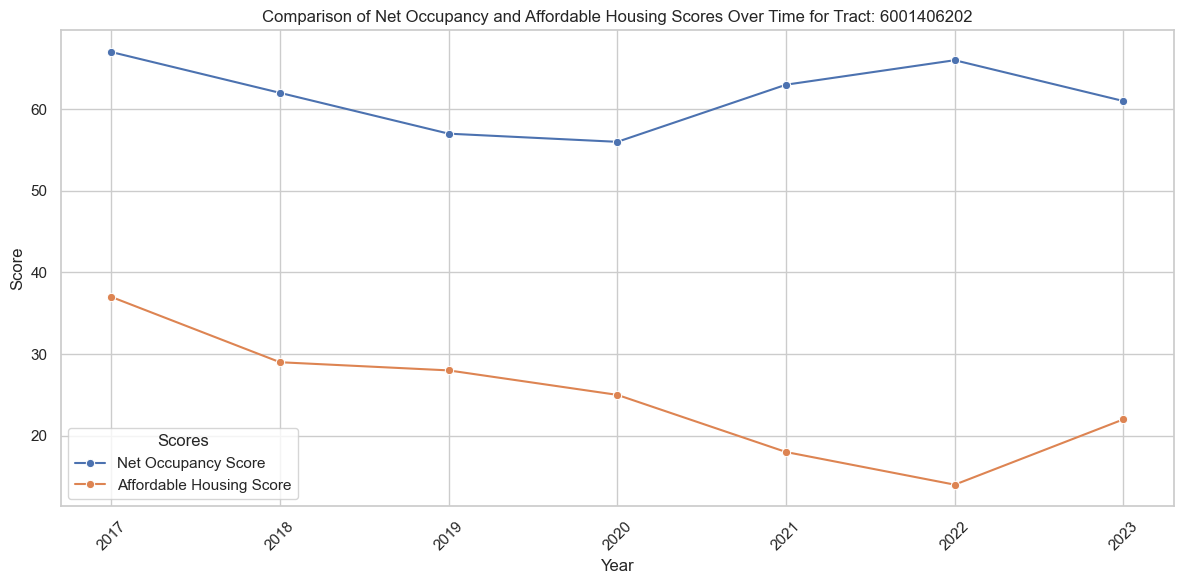

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
comp_tracts_df = pd.read_csv("IGS_7_tracts.csv")

# Set the style of the visualization
sns.set(style="whitegrid")

# Choose a specific tract code to analyze
specific_tract = tracts[0]  # Replace with the actual tract code

# Filter the DataFrame for the specific tract
tract_data = comp_tracts_df[comp_tracts_df['Census Tract FIPS code'] == specific_tract]

# Check if tract_data is not empty
if len(tract_data) == 0:
    print("No data available for the specified tract.")
else:
    # Create the line plot
    plt.figure(figsize=(12, 6))

    # Plot Net Occupancy Score
    sns.lineplot(data=tract_data, x='Year', y='Net Occupancy Score', marker='o', label='Net Occupancy Score')
    
    # Plot Affordable Housing Score
    sns.lineplot(data=tract_data, x='Year', y='Affordable Housing Score', marker='o', label='Affordable Housing Score')

    # Adding title and labels
    plt.title(f'Comparison of Net Occupancy and Affordable Housing Scores Over Time for Tract: {specific_tract}')
    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(title='Scores')

    # Show the plot
    plt.tight_layout()
    plt.show()


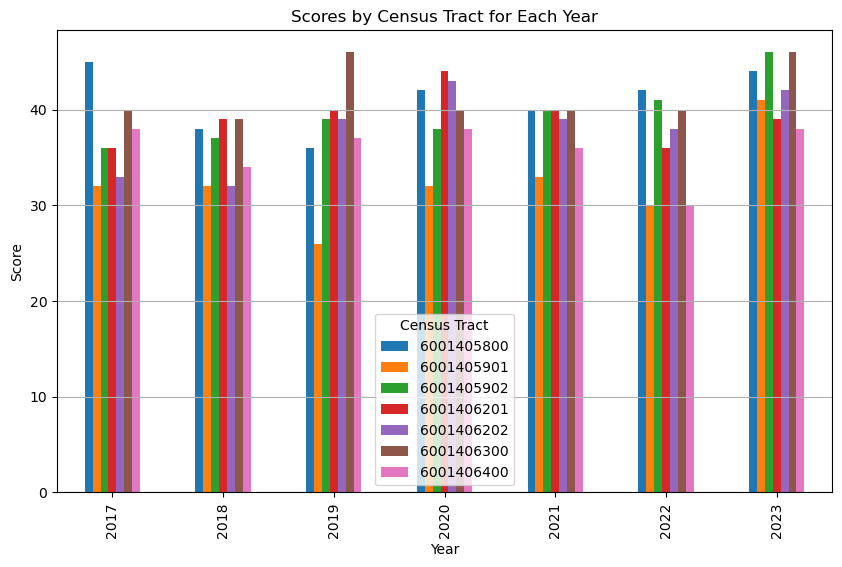

In [7]:
df.pivot(index='Year', columns='Census Tract FIPS code', values='Inclusive Growth Score').plot(kind='bar', figsize=(10, 6))
plt.title('Scores by Census Tract for Each Year')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend(title='Census Tract')
plt.grid(axis='y')
plt.show()


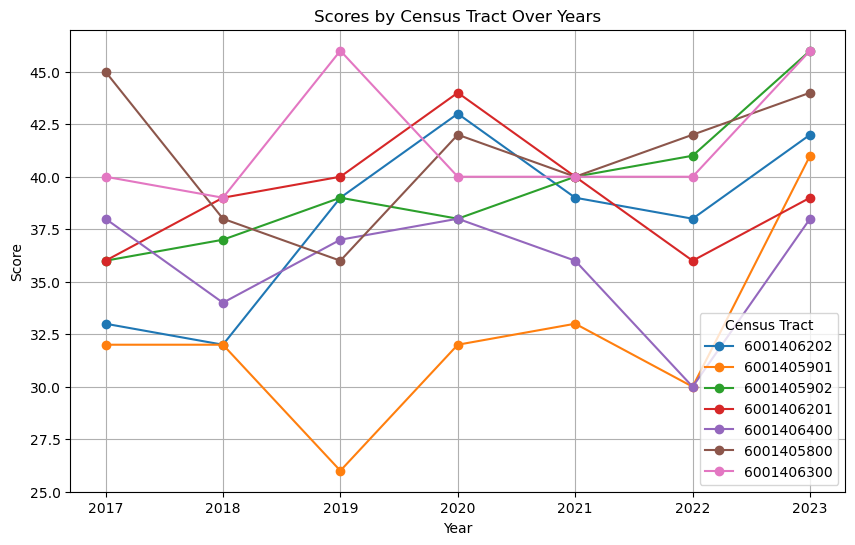

In [124]:
plt.figure(figsize=(10, 6))
for tract in df['Census Tract FIPS code'].unique():
    plt.plot(df[df['Census Tract FIPS code'] == tract]['Year'], df[df['Census Tract FIPS code'] == tract]['Inclusive Growth Score'], marker='o', label=tract)
plt.title('Scores by Census Tract Over Years')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend(title='Census Tract')
plt.grid(True)
plt.show()
